# Evaluating Model Fit

So far we've used the sum of the squared errors as a measure of model fit, looking for models with smaller errors. In this lab we'll investigate a new mesure of model fit, the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) $r^2$, and see how it's influenced by outliers.



R-squared is defined in terms of a ratio of the variance of the data, $SS_{tot}$ and the sum of squared error of the residuals of the model fit $SS_{res}$. Let's assume that our model has the form

$$y_i = f(x_i) + e_i$$

For some model function $f$. The mean of the data targets is $\bar{y}$. We can write $r^2$ as:

$$ r^2  = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_{i}{\left(y_i - \bar{y} \right)^2}}{\sum_{i}{\left(y_i - f_i \right)^2}}$$

Put another way, $r^2$ or ($R^2$) is a measurement of how well the variance in the data is explained by the model
## Visualizing $r^2$
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6b863cb70dd04b45984983cb6ed00801d5eddc94)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Coefficient_of_Determination.svg/800px-Coefficient_of_Determination.svg.png)

## Understanding $r^2$
To help understand this measure, let's consider a few special cases.
* If our model is a perfect fit then the predictions of the model always match the true values, i.e. $y_i = f(x_i) = f_i$. This means that the squared error of the residuals is 0, so r^2 is:

$$ r^2  = 1 - \frac{SS_{res}}{SS_{tot}} =  1 - \frac{0}{SS_{tot}} = 1$$







* If our model always predicted the mean value, $y_i = \bar{y}$ for all data points, then the two sum of squares terms are equal:

$$ r^2  = 1 - \frac{SS_{res}}{SS_{tot}} =  1 - 1 = 0$$

This is not a very good model -- it's simply a constant prediction, and does not vary over the data points.

* Typically the better the model the larger the value of $r^2$, with $r^2=1$ being an exact fit.

**Check**: It is possible for $r^2$ to be negative, despite the name. How could that happen?

## Let's look at some data

Scikit-learn can compute $r^2$ for us, so let's explore some actual data.

In [1]:
# Let's load in some packages

% matplotlib inline

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model

# Load the Boston Housing dataset
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Take a look at the data again
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [2]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## First example

Let's pick two variables and plot them against each other with a best fit line. For example, let's see if the Pupil-Teacher ratio by town and the age of a property are related.

('Coefficients: \n', array([ 3.40024714]))
Variance score: 0.07
Residual sum of squares: 790.79
Bias: 736.70009547
Variance: 54.0823773467
('r^2:', 0.068390101329784181)


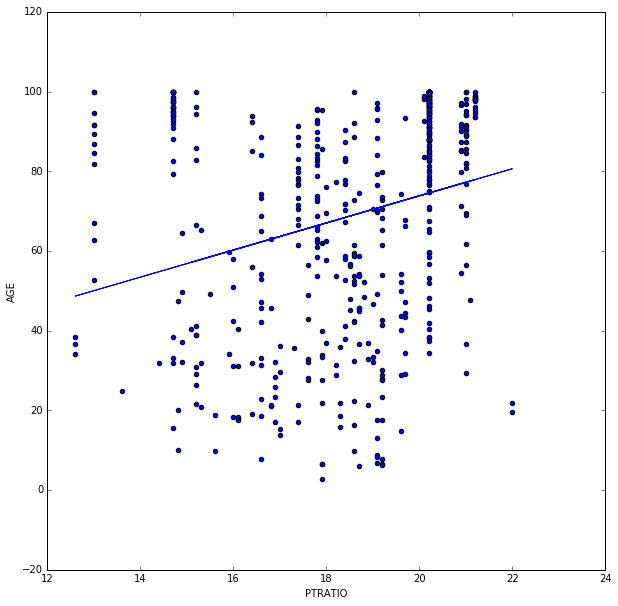

In [8]:
#0.A: set data to x and y (observed), 0.B: (if relevant) create for loop with X = polynomials(domain(?), i) to try models with
#increasing number of terms, with increasing magnitude (see polynomial) 
#1: declare linear model, #2, fit with the training data, #3 use inputs to predict y, setting that equal to yhat
#4: calculate mse, variance and bias to evaluate your model, #5 put variance and bias in lists



# Fit a line

vars = []
bias_list = []

lm = linear_model.LinearRegression()

X = df[["PTRATIO"]]
y = df["AGE"]

model = lm.fit(X, y)
yhat = lm.predict(X)
mse = np.mean((np.mean(yhat)-y)**2)
var = np.var(yhat)
bias = mse - var - 0.01
bias_list.append(bias)
vars.append(var)


# Plot the data and the best fit line
## The data
plt.scatter(X, y)
## The line / model
plt.plot(X, yhat)
plt.ylabel("AGE")
plt.xlabel("PTRATIO")
   # The coefficients
print('Coefficients: \n', lm.coef_)
    # Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(X, y)) 
# .score(data input, output data observed) on a linear_model without having fit the data yet just gives the variance

    # The mean square error
print("Residual sum of squares: %.2f" % mse)

print("Bias: {bias}".format(bias=bias))
print("Variance: {var}".format(var=var))
print("r^2:", model.score(X,y)) #note that model = lm.fit(X,y), therefore .score(data input, observed output) is taking the 
#r^2 value instead of the variance


The data doesn't appear to be all that linear so we should find that the model fit is poor. Let's calculate the $r^2$ value.

In [7]:
# Scikit-learn makes it easy to get the score
print "r^2:", model.score(X,y)

r^2: 0.0683901013298


In this case the $r^2$ value is close to zero, as expected.



### Exercise 1
Repeat this for each pair of variables in the housing data set:
* Fit a linear model
* Compute the $r^2$ score

Hint: use a pair of loops to cut down on the boilerplate code.

For which two variables is the $r^2$ value the highest? The lowest? Plot the highest and lowest scores -- does the data seem to fit the $r^2$ score?



In [79]:
# Exercise 1 Code  failure here, answer is below


for i in len(df.columns):
    for h in range(10):
        polynomial(df.columns[i], h)
        

    df[i]

    
    #0.A: set data to x and y (observed), 0.B: (if relevant) create for loop with X = polynomials(domain(?), i) to try models with
#increasing number of terms, with increasing magnitude (see polynomial) 
#1: declare linear model, #2, fit with the training data, #3 use inputs to predict y, setting that equal to yhat
#4: calculate mse, variance and bias to evaluate your model, #5 put variance and bias in lists


domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(i) 


# Fit a line

vars = []
bias_list = []

lm = linear_model.LinearRegression()

X = polynomials(domain, i) 
y = 

model = lm.fit(X, y)
yhat = lm.predict(X)
mse = np.mean((np.mean(yhat)-y)**2)
var = np.var(yhat)
bias = mse - var - 0.01
bias_list.append(bias)
vars.append(var)


# Plot the data and the best fit line
## The data
plt.scatter(X, y)
## The line / model
plt.plot(X, yhat)
plt.ylabel("?????")
plt.xlabel("???")
   # The coefficients
print('Coefficients: \n', lm.coef_)
    # Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(X, y)) 
# .score(data input, output data observed) on a linear_model without having fit the data yet just gives the variance

    # The mean square error
print("Residual sum of squares: %.2f" % mse)

print("Bias: {bias}".format(bias=bias))
print("Variance: {var}".format(var=var))
print("r^2:", model.score(X,y)) #note that model = lm.fit(X,y), therefore .score(data input, observed output) is taking the 
#r^2 value instead of the variance


In [30]:
#nifty solution code to go through a dataframe and return the r^2 for each relationship within



for i, label1 in enumerate(df.columns):
    for j, label2 in enumerate(df.columns):
        if j>= i:
            continue
        X = df[[label1]] #takes in x as a dataframe instead of a series, because its assuming many inputs, 
        # could also be: X = df[[label1, label3, label4, label5]] 
        y = df[label2] #does not require a list, because will always be a single 'predicted' variable
        
        model = lm.fit(X,y)
        yhat = lm.predict(X)
        r_sqs = [[label1], [label2], [model.score(X,y)]]
        
        #print(r_sqs)

        


ValueError: need more than 1 value to unpack

### Exercise 2

Use seaborn's [linear plotting functions](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html) to take a closer look at your highest and lowest $r^2$ pairs.

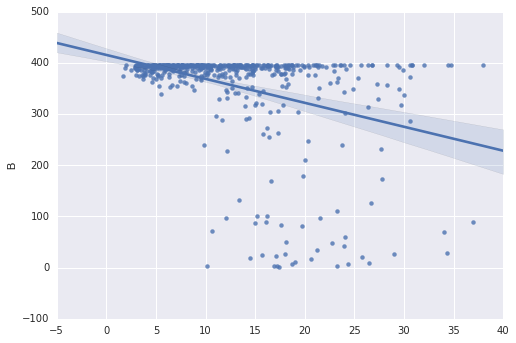

In [17]:
# Exercise 2
import seaborn as sns




sns.regplot(x=X, y=y, data=df)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

## Exercise 3

Recall from our earlier exploration the best model you found that utilizes as many variables from the housing data as you'd like. What is the $r^2$ value for that model?

In [87]:
# Exercise 3 (answers will vary)



# Interpreting $r^2$

While it's typically the case that higher $r^2$ values are better models, this is not always the case. We can have high $r^2$ for biased models and low $r^2$ for noisy data. Let's explore both cases. We've been making polynomial fits with scikit-learn so let's change it up and use numpy. We'll use numpy's [polyfit](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html) and [polyval](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.polyval.html) functions. I'll show you the quadratic fit first and you'll follow with the linear fit.

## Exercise:
Fit the same data with a linear fit using numpy.

In [31]:
# Here's some quadratic data with a bit of noise
import scipy

noise = scipy.stats.norm(0, 4)
data = [(x, 3*x*x - 5*x + 3 + noise.rvs()) for x in np.arange(-6, 2, 0.5)]

xs = [x for (x, y) in data]
ys = [y for (x, y) in data]

0.996097316026333

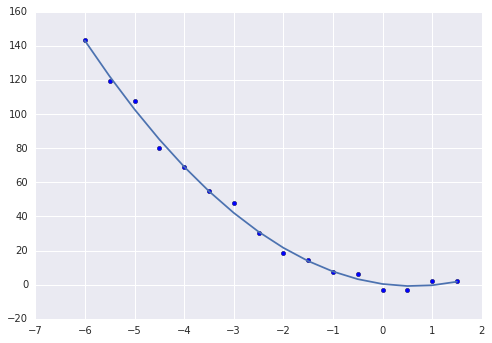

In [42]:
# Now let's fit a quadratic model with numpy
# polyfit gives us the coefficients of the best fit polynomial
coef = np.polyfit(xs, ys, deg=2)
# polyvals gives us the polynomial function for these coefficients
predictions = np.polyval(coef, xs)

# Let's plot the model
plt.scatter(xs, ys)
plt.plot(xs, predictions)

# Here's another way to get r^2 from scipy
from sklearn import metrics
metrics.r2_score(ys, predictions)

In [82]:
# Exercise Code here


You should have seen that the $r^2$ was quite good in both cases, however the quadratic model is much better. So don't get complacement when you get a pretty good $r^2$ score -- you could still have a biased model!

# Exercise

Now let's look at the effect of outliers. Just one outlier can really skew your models. Let's add outlier to our data and redo both the quadratic and the linear fits. Which model type drops the most in $r^2$?

In [53]:
xs.append(2)
ys.append(120)

In [84]:
# Repeat the Quadratic fit

In [83]:
# And the linear fit


You should have seen that the $r^2$ for both models decreased dramatically! Just as in the case of higher $r^2$ values, you should be suspicious of smaller values as well. There could be outliers in the dataset from exceptional cases, bad data points, or poor measuring instruments that are obscuring the relationships in your data.

**Check**: How closely did you look at the housing data? Are there any cases in which outliers are obviously a problem?
> Answer: The plot for "TAX" and "RAD" has a pretty obvious outlier.

You might be thinking: how can we detect and exclude outliers? It turns out that this is a [hard question to answer](https://en.wikipedia.org/wiki/Outlier#Identifying_outliers) and is often subjective. There are some methods, such as [Dixon's Q test](https://en.wikipedia.org/wiki/Dixon's_Q_test) and many others. Always make visualizations of your data when possible and remove outliers as appropriate, making sure that you can justify your selections!

## Confounding Variables

Another important topic when it comes to goodness of fit is [confounding variables](https://en.wikipedia.org/wiki/Confounding). It's tempting to think of models as causal but as you have likely heard before, [correlation is not causation](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation). Similarly, a high $r^2$ doesn't necessarily mean that two quantities are related in a predictive or causal manner. There are a number of examples [here](http://blog.searchmetrics.com/us/2015/09/11/ranking-factors-infographic-correlation-vs-causality/), including a nice plot of a seemingly strong relationship between per capita cheese consumption and the number of people who died by becoming tangled in their bedsheets! There is a very nice [case study](http://ocw.jhsph.edu/courses/fundepiii/pdfs/lecture18.pdf) of bias and confounding in disease studies. It's worth your time to read through the slides. 

The takeaway message is that you always need to check that your conclusions make sense rather than blindly interpretting statistical values. As a data scientist you will often present analyses to stakeholders and they will ask questions about the causes of the relationships you find and the logical basis of the models you fit.

# Exercises

If you've gotten this far then you're doing great! Let's look at a case where a series of models have increasing better $r^2$ values as the models become more complex. Consider the function $y = sin(x)$ on the interval $[0, 6\pi]$ (data below). If you fit polynomials of higher and higher degree to this function, you should find that the $r^2$ value increases as the degreee increases. Your task is to make a plot of $r^2$ versus polynomial degree as follows:
* Write a loop to fit polynomials of degrees from 0 to 10 to the sine function
* Plot the fits together on the same graph with the data
* Compute the $r^2$ values for each model
* Make a plot of degree versus $r^2$.

Compare and contrast with earlier lessons. In some cases increasing the degree of a polynomial model can alter the tradeoff between bias and variance. Try to explain your results in that context.

In [77]:
import math
noise = scipy.stats.norm(0, 0.1)
data = [(x, math.sin(x) + noise.rvs() ) for x in np.arange(0, 6 * 3.14, 0.1)]
xs = [x for (x, y) in data]
ys = [y for (x, y) in data]

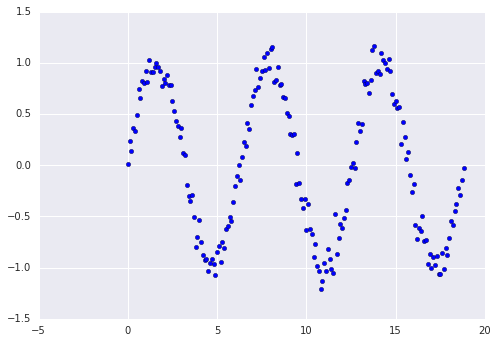

In [85]:
from sklearn import metrics
rs = []

# Let's plot the model
plt.scatter(xs, ys)

for degree in range(1, 11):
    # Fill in the modeling steps here
    pass

# Make the plots
